In [1]:
import random

In [2]:
random.randint(-90, 90)

-49

In [3]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1

In [4]:
import numpy as np

In [5]:
import timeit

In [6]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

10.7 µs ± 91.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [7]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.07 ms ± 5.59 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [11]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [12]:
coordinates = list(lat_lngs)

In [13]:
from citipy import citipy

In [14]:
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

isangel vu
amderma ru
pitimbu br
cabo san lucas mx
hualmay pe
port hardy ca
vaini to
hofn is
zhuanghe cn
rikitea pf
mahebourg mu
nishihara jp
punta arenas cl
ponta delgada pt
paredon mx
atuona pf
tiksi ru
lorengau pg
vaini to
lashio mm
meulaboh id
esperance au
rikitea pf
hilo us
westport ie
sao filipe cv
rikitea pf
bluff nz
nizhniy tsasuchey ru
cape town za
yar-sale ru
rikitea pf
malakal sd
mantua cu
hilo us
ribeira grande pt
butaritari ki
rikitea pf
illoqqortoormiut gl
georgetown sh
pevek ru
kapaa us
cape town za
butaritari ki
new norfolk au
santa rosa co
thouars fr
jamestown sh
guarapari br
evensk ru
ushuaia ar
deniliquin au
faya td
bethel us
bukama cd
barrow us
haibowan cn
kapaa us
ribeira grande pt
mergui mm
samarai pg
tuktoyaktuk ca
souillac mu
rikitea pf
dafeng cn
rikitea pf
felidhoo mv
baghdad iq
talara pe
arawa pg
barentsburg sj
pacific grove us
kargasok ru
onega ru
punta arenas cl
srednekolymsk ru
lodja cd
beisfjord no
atuona pf
vila vu
imbituba br
norman wells ca
barrow us
ne

buluang ph
mataura pf
hilo us
da nang vn
eyl so
sao joao da barra br
dikson ru
kodiak us
mataura pf
lorengau pg
grand gaube mu
ostrovnoy ru
kapaa us
guajara-mirim br
yellowknife ca
bagdarin ru
kapaa us
ust-maya ru
hobart au
meulaboh id
ushuaia ar
constitucion mx
den helder nl
mataura pf
ushuaia ar
punta arenas cl
kapaa us
pitimbu br
namibe ao
hami cn
dikson ru
namibe ao
fairbanks us
timaru nz
esperance au
saint-philippe re
mys shmidta ru
kargil in
ushuaia ar
vaini to
san antonio cl
jamestown sh
punta arenas cl
avarua ck
jian cn
yellowknife ca
amursk ru
ushuaia ar
rikitea pf
hermanus za
muros es
albany au
sentyabrskiy ru
punta arenas cl
lebu cl
umzimvubu za
hilo us
lagoa pt
kununurra au
illoqqortoormiut gl
carnarvon au
louisbourg ca
hobyo so
sumbe ao
zapadnaya dvina ru
marcona pe
tuatapere nz
hermanus za
bluff nz
ponta do sol cv
adrar dz
mar del plata ar
boende cd
tatawin tn
vila velha br
yellowknife ca
ancud cl
ribeira grande pt
cabo san lucas mx
ushuaia ar
grindavik is
cape town za
co

In [15]:
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [16]:
import requests
from config import weather_api_key

In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
city_url = url + "&q=" + "Boston"

In [19]:
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [20]:
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [21]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [22]:
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":601,"main":"Snow","description":"snow","icon":"13n"}],"base":"stations","main":{"temp":28.18,"feels_like":28.18,"temp_min":23.74,"temp_max":31.21,"pressure":1013,"humidity":81},"visibility":4023,"wind":{"speed":1.01,"deg":279,"gust":5.01},"snow":{"1h":1.13},"clouds":{"all":100},"dt":1643083901,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1643025906,"sunset":1643060836},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [23]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 601,
   'main': 'Snow',
   'description': 'snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 28.18,
  'feels_like': 28.18,
  'temp_min': 23.74,
  'temp_max': 31.21,
  'pressure': 1013,
  'humidity': 81},
 'visibility': 4023,
 'wind': {'speed': 1.01, 'deg': 279, 'gust': 5.01},
 'snow': {'1h': 1.13},
 'clouds': {'all': 100},
 'dt': 1643083901,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1643025906,
  'sunset': 1643060836},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [24]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [25]:
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [26]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 601,
   'main': 'Snow',
   'description': 'snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 28.18,
  'feels_like': 28.18,
  'temp_min': 23.74,
  'temp_max': 31.21,
  'pressure': 1013,
  'humidity': 81},
 'visibility': 4023,
 'wind': {'speed': 1.01, 'deg': 279, 'gust': 5.01},
 'snow': {'1h': 1.13},
 'clouds': {'all': 100},
 'dt': 1643083901,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1643025906,
  'sunset': 1643060836},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [27]:
boston_data = city_weather.json()

In [28]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 31.21 81 100 1.01


In [29]:
from datetime import datetime

#date = boston_data["dt"]

#datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [30]:
import time
from datetime import datetime

In [31]:
#city_data = []

#print("Beginning Data Retrieval     ")
#print("-----------------------------")

#record_count = 1
#set_count = 1

In [32]:
#for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
        #time.sleep(60)

    # Create endpoint URL with each city.
    #city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    #print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    #record_count += 1
    #try:
        # Parse the JSON and retrieve data.
        #city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        #city_lat = city_weather["coord"]["lat"]
        #city_lng = city_weather["coord"]["lon"]
        #city_max_temp = city_weather["main"]["temp_max"]
        #city_humidity = city_weather["main"]["humidity"]
        #city_clouds = city_weather["clouds"]["all"]
        #city_wind = city_weather["wind"]["speed"]
        #city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        #city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        #city_data.append({"City": city.title(),
                          #"Lat": city_lat,
                          #"Lng": city_lng,
                          #"Max Temp": city_max_temp,
                          #"Humidity": city_humidity,
                          #"Cloudiness": city_clouds,
                          #"Wind Speed": city_wind,
                          #"Country": city_country,
                          #"Date": city_date})

# If an error is experienced, skip the city.
    #except:
        #print("City not found. Skipping...")
        #pass

# Indicate that Data Loading is complete.
#print("-----------------------------")
#print("Data Retrieval Complete      ")
#print("-----------------------------")

In [33]:
#city_data_df = pd.DataFrame(city_data)
#city_data_df.head(10)

In [34]:
#new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
#city_data_df = city_data_df[new_column_order]
#city_data_df.head(10)

In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
#city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
#To keep data the same, we are going to comment out all the previous code that fetches the data we need, and now load from the CSV we made.
city_data_df = pd.read_csv(output_data_file)
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

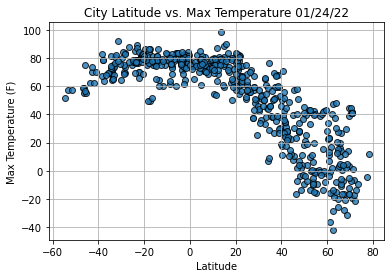

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

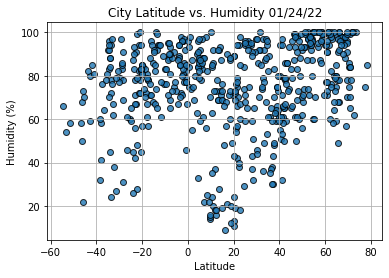

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

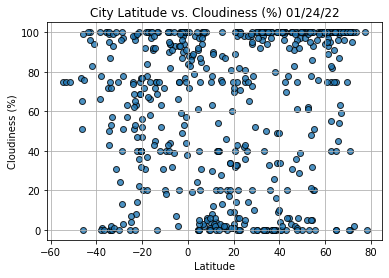

In [40]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

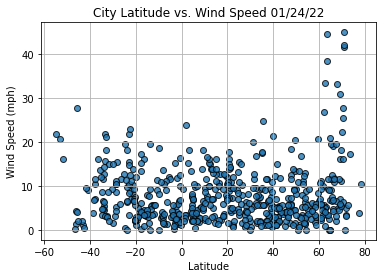

In [41]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [42]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-01-23 22:20:42,42.6001,-73.9662,28.47,78,100,1.90
1,Tuktoyaktuk,CA,2022-01-23 22:22:53,69.4541,-133.0374,3.20,78,100,6.91
2,Ahuimanu,US,2022-01-23 22:22:54,21.4447,-157.8378,82.11,66,100,4.00
3,Hilo,US,2022-01-23 22:22:54,19.7297,-155.0900,80.33,71,75,10.36
4,Yellowknife,CA,2022-01-23 22:19:58,62.4560,-114.3525,-15.59,82,40,5.75


In [44]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

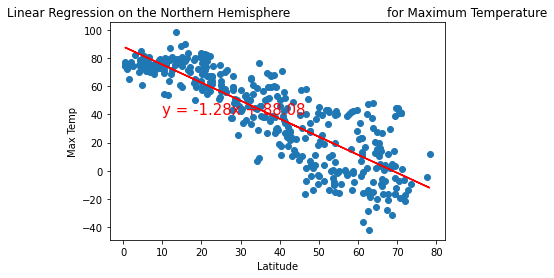

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

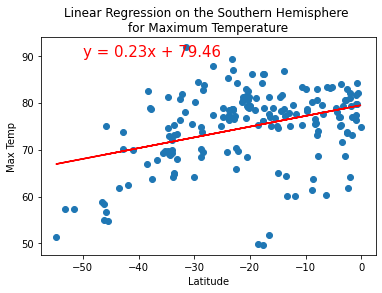

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,90))

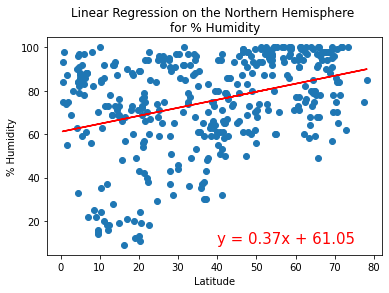

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

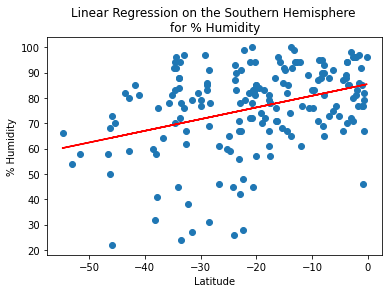

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

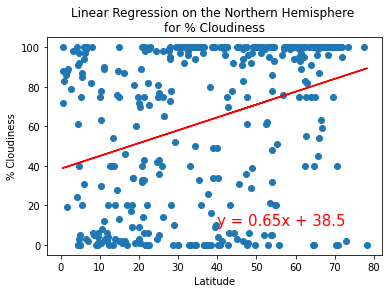

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

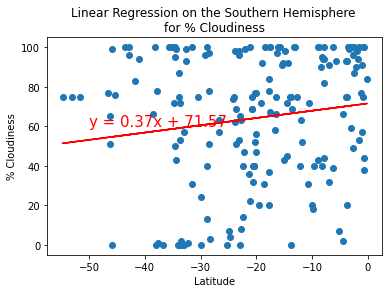

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

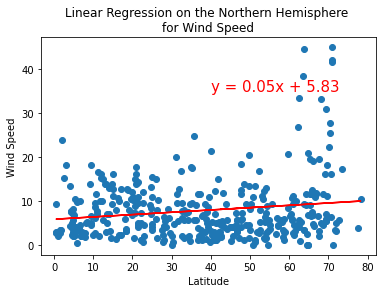

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

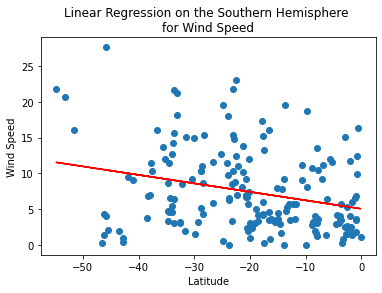

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
#6.5.1